# **Multiclass Classification: Fashion MNIST Dataset**

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Prepare the mnist data

In [2]:
from tensorflow.keras.datasets import fashion_mnist
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()
len(train_data), len(train_labels), len(test_data), len(test_labels)

(60000, 60000, 10000, 10000)

In [3]:
train_data[0].shape, train_labels[0].shape

((28, 28), ())

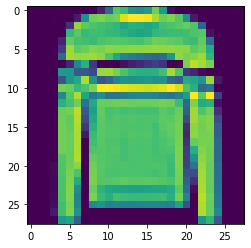

In [4]:
# plot the a sample
plt.imshow(train_data[5])
plt.show()

In [5]:
# label for sample data
train_labels[5]

2

In [6]:
# Create a small list so we can index onto our training labels so they're human-readable 
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

len(class_names)

10

### Building a multi-class classification model

For our multi-class classification model, we can use a similar architecture to our binary classifiers, however, we're going to have to tweak a few things:

* Input shape = 28 x 28 (the shape of one image)
* Output shape = 10 (one per class of clothing)
* Loss function = tf.keras.losses.CategoricalCrosstentropy()
    * If your labels are **one-hot encoded**, use **CategoricalCrossentropy()**
    * If your labels are **integer** form use **SparseCategoricalCrossentropy()**
* Output layer activation = Softmax (not sigmoid)

In [15]:
# our data needs to be flattened (from 28*28 to None, 784)
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28))])
flatten_model.output_shape

(None, 784)

In [8]:
flatten_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


In [9]:
# set random seed
tf.random.set_seed(42)

# create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# compile the model
model_1.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# fit the model
history_1 = model_1.fit(
                train_data, 
                tf.one_hot(train_labels, depth=10),
                epochs=10,
                validation_data=(test_data, tf.one_hot(test_labels, depth=10))
)

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 2.1600 - accuracy: 0.1635 - val_loss: 1.7964 - val_accuracy: 0.2052
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 1.6991 - accuracy: 0.2586 - val_loss: 1.6393 - val_accuracy: 0.2865
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 1.6290 - accuracy: 0.2838 - val_loss: 1.6016 - val_accuracy: 0.3063
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 1.6063 - accuracy: 0.2858 - val_loss: 1.5969 - val_accuracy: 0.2815
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 1.5852 - accuracy: 0.2989 - val_loss: 1.5732 - val_accuracy: 0.3179
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 1.5759 - accuracy: 0.3050 - val_loss: 1.5814 - val_accuracy: 0.3022
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 1.5671 - accuracy: 0.3124 - val_loss: 1.5852 - val_ac

In [10]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


### Creating the model after normalizing of the data

In [11]:
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

#train_data_norm[0], train_labels_norm[0]
train_data_norm.shape, test_data_norm.shape

((60000, 28, 28), (10000, 28, 28))

In [12]:
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

#### Creating another model with below changes:
   
   * normalized input data
   * using tf.keras.losses.**SparseCategoricalCrossentropy()**

In [13]:
# seet seed
tf.random.set_seed(42)

# create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# compile the model
model_2.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# fit the model
history_2 = model_2.fit(
                    train_data_norm,
                    train_labels,
                    epochs=10,
                    validation_data=(test_data_norm, test_labels)
)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7175 - accuracy: 0.7461 - val_loss: 0.5048 - val_accuracy: 0.8237
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4600 - accuracy: 0.8387 - val_loss: 0.5208 - val_accuracy: 0.8253
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4300 - accuracy: 0.8480 - val_loss: 0.4620 - val_accuracy: 0.8366
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4135 - accuracy: 0.8546 - val_loss: 0.4489 - val_accuracy: 0.8395
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4028 - accuracy: 0.8580 - val_loss: 0.4660 - val_accuracy: 0.8372
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3944 - accuracy: 0.8601 - val_loss: 0.4601 - val_accuracy: 0.8363
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3882 - accuracy: 0.8636 - val_loss: 0.4499 - val_accuracy:

In [16]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                7850      
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
 dense_5 (Dense)             (None, 10)                110       
                                                                 
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________


<AxesSubplot:xlabel='epoch'>

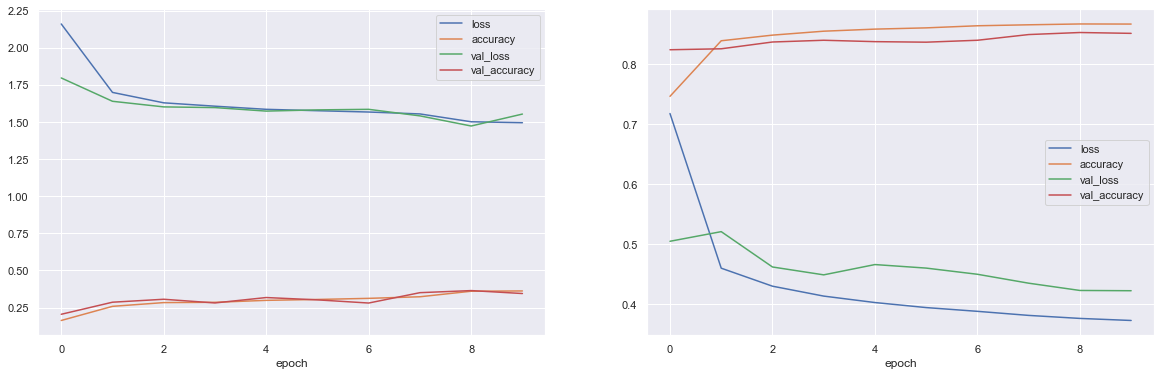

In [50]:
# let's plot the history of non-normalized and normalized models
sns.set()
fig, ax = plt.subplots(1, 2)
ax[0].set_xlabel("epoch")
ax[1].set_xlabel("epoch")
pd.DataFrame(history_1.history).plot(ax=ax[0], figsize=(20, 6))
pd.DataFrame(history_2.history).plot(ax=ax[1])

### finding the ideal learning rate

In [54]:
# set random seed
tf.random.set_seed(42)

# create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="sigmoid")
])

# compile the model
model_3.compile(
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# create the learning scheduler
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# fit the model
history_3 = model_3.fit(
    train_data_norm,
    train_labels,
    validation_data=(test_data_norm, test_labels),
    epochs=50,
    callbacks=[lr_scheduler]
)

Epoch 1/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.7175 - accuracy: 0.7461 - val_loss: 0.5048 - val_accuracy: 0.8237 - lr: 0.0010
Epoch 2/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4618 - accuracy: 0.8375 - val_loss: 0.5205 - val_accuracy: 0.8259 - lr: 0.0011
Epoch 3/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4323 - accuracy: 0.8471 - val_loss: 0.4621 - val_accuracy: 0.8354 - lr: 0.0013
Epoch 4/50
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4179 - accuracy: 0.8526 - val_loss: 0.4592 - val_accuracy: 0.8369 - lr: 0.0014
Epoch 5/50
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4092 - accuracy: 0.8558 - val_loss: 0.4612 - val_accuracy: 0.8378 - lr: 0.0016
Epoch 6/50
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4031 - accuracy: 0.8571 - val_loss: 0.4684 - val_accuracy: 0.8313 - lr: 0.0018
Epoch 7/50
1875/1875 [==============================

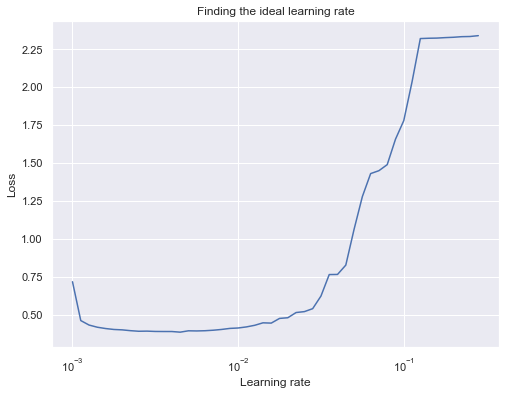

In [68]:
# plot the learning rate decay curve
# history_3.history is a dict and has loss, accuracy, val_loss and lr

lrs = 1e-3 * (10**(tf.range(50)/20))
plt.figure(figsize=(8, 6))
plt.semilogx(lrs, history_3.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")
plt.show()

In [72]:
min(history_3.history["loss"])
history_3.history["loss"].index(min(history_3.history["loss"]))

13

In [75]:
1e-3 * (10**(tf.range(50)/20))[13]

<tf.Tensor: shape=(), dtype=float64, numpy=0.004466835921509631>

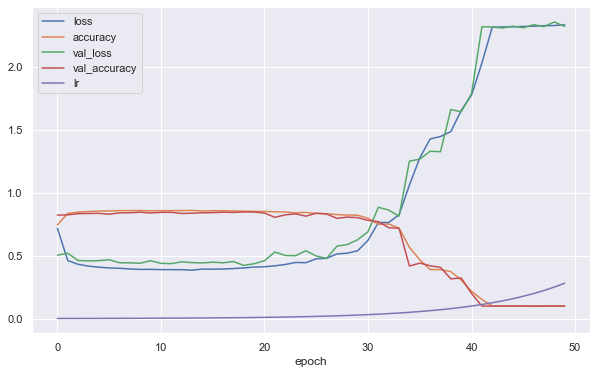

In [79]:
pd.DataFrame(history_3.history).plot(figsize=(10, 6))
plt.xlabel("epoch")
plt.show()

### creating a new model with below updated values:

   * **learning rate:** 004
   * **number of epochs:** 14

In [80]:
# set random seed
tf.random.set_seed(42)

# create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="sigmoid")
])

# compile the model
model_4.compile(
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.004), # using new learning rate
    metrics=["accuracy"]
)


# fit the model
history_4 = model_4.fit(
    train_data_norm,
    train_labels,
    validation_data=(test_data_norm, test_labels),
    epochs=14 # using new epoch
)

Epoch 1/14
1875/1875 [==============================] - 12s 6ms/step - loss: 0.6839 - accuracy: 0.7566 - val_loss: 0.5463 - val_accuracy: 0.8092
Epoch 2/14
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5131 - accuracy: 0.8206 - val_loss: 0.5271 - val_accuracy: 0.8185
Epoch 3/14
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4900 - accuracy: 0.8260 - val_loss: 0.5148 - val_accuracy: 0.8174
Epoch 4/14
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4711 - accuracy: 0.8334 - val_loss: 0.5018 - val_accuracy: 0.8217
Epoch 5/14
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4632 - accuracy: 0.8364 - val_loss: 0.5228 - val_accuracy: 0.8160
Epoch 6/14
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4524 - accuracy: 0.8390 - val_loss: 0.5016 - val_accuracy: 0.8231
Epoch 7/14
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4500 - accuracy: 0.8403 - val_loss: 0.5045 - val_accuracy

### Evaluating our multi-class classification model

In [102]:
# Create a confusion matrix
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
    sns.reset_orig()
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
    n_classes = cm.shape[0]

    # Let's prettify it
    fig, ax = plt.subplots(figsize=figsize)
    # Create a matrix plot
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)

    # Set labels to be classes 
    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

    # Label the axes
    ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels, 
        yticklabels=labels)

    # Set x-axis labels to bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    # Adjust label size
    ax.yaxis.label.set_size(text_size)
    ax.xaxis.label.set_size(text_size)
    ax.title.set_size(text_size)

    # Set threshold for different colors
    threshold = (cm.max() + cm.min()) / 2.

    # Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)

In [103]:
# Make predictions
y_probs = model_4.predict(test_data_norm)

In [104]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([4.4625555e-04, 5.4868275e-07, 3.0663104e-03, 6.0330905e-02,
        1.9257367e-04, 9.9724764e-01, 1.1031758e-03, 9.9987006e-01,
        9.3488300e-01, 9.9997365e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [105]:
# Convert all of the prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [106]:
# make confusion metrics
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                y_pred=y_preds)

array([[846,   1,  21,  51,   6,   2,  54,   1,  18,   0],
       [  7, 935,   4,  42,   5,   0,   2,   0,   4,   1],
       [ 27,   0, 679,  20, 220,   0,  37,   0,  17,   0],
       [ 30,   6,  28, 866,  45,   1,  15,   0,   9,   0],
       [  0,   0,  67,  37, 858,   0,  31,   0,   7,   0],
       [  1,   0,   0,   1,   0, 879,   0,  66,  10,  43],
       [203,   3, 138,  60, 159,   2, 405,   1,  29,   0],
       [  0,   0,   0,   0,   0,  14,   0, 939,   4,  43],
       [  4,   0,   6,  11,   8,   3,   5,   5, 957,   1],
       [  1,   0,   0,   1,   0,  45,   0,  49,   0, 904]])

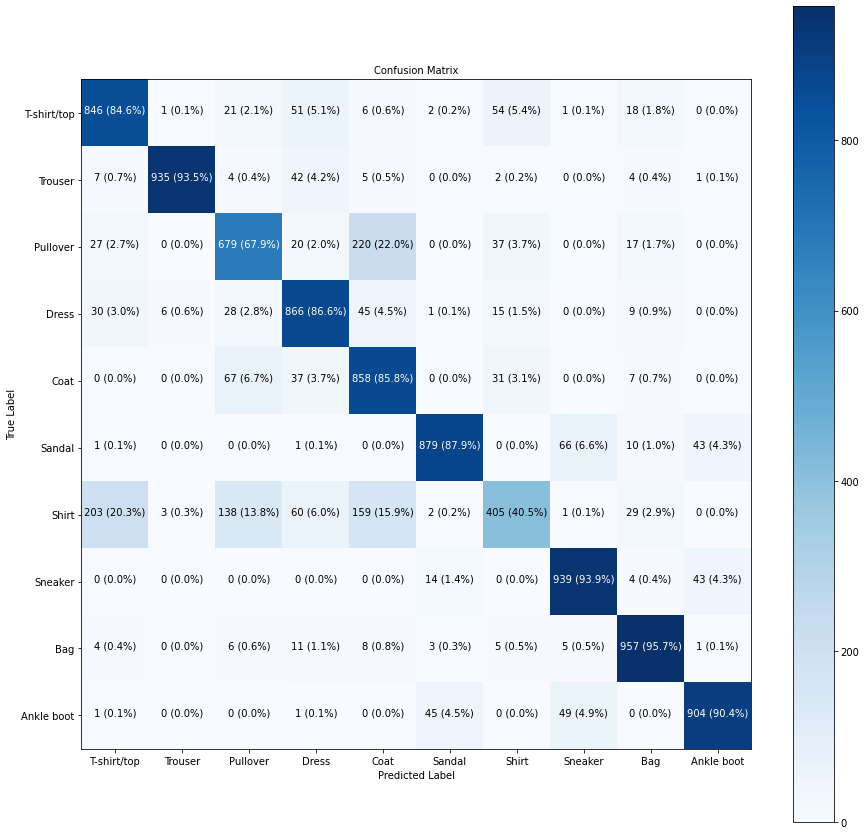

In [107]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels, 
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

## What patterns is our model learning?

In [108]:
# Find the layers of our most recent model
model_4.layers

In [115]:
# Get the patterns of a layer in our network
weights, biases = model_4.layers[1].get_weights()
weights, weights.shape

(array([[ 0.02861048, -0.5231527 , -0.02557759, ...,  0.06475256,
          0.33400142,  1.0559832 ],
        [-0.52779645, -1.2794137 , -0.06377345, ...,  0.00369113,
         -0.25130734,  2.1966772 ],
        [-0.49449742, -2.9780626 , -0.06822798, ..., -0.05031011,
          0.93599343,  0.61117834],
        ...,
        [ 1.2785059 , -1.0272776 ,  0.01359267, ..., -0.03638687,
         -0.44472113,  1.2900366 ],
        [-0.08780413, -0.47690797,  0.06272373, ..., -0.03639354,
          1.5952816 ,  1.7162542 ],
        [-1.074847  , -0.42086583, -0.05111133, ...,  0.05676701,
          1.1517652 ,  2.3730173 ]], dtype=float32),
 (784, 10))

In [117]:
model_4.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 10)                7850      
                                                                 
 dense_13 (Dense)            (None, 10)                110       
                                                                 
 dense_14 (Dense)            (None, 10)                110       
                                                                 
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________


In [119]:
# Bias and biases shapes
biases, biases.shape

(array([ 3.6473753 ,  0.52852887, -0.03092563, -0.04054382,  1.9529614 ,
        -0.13232805,  1.4343233 , -0.02893035,  1.4846711 ,  1.7508137 ],
       dtype=float32),
 (10,))

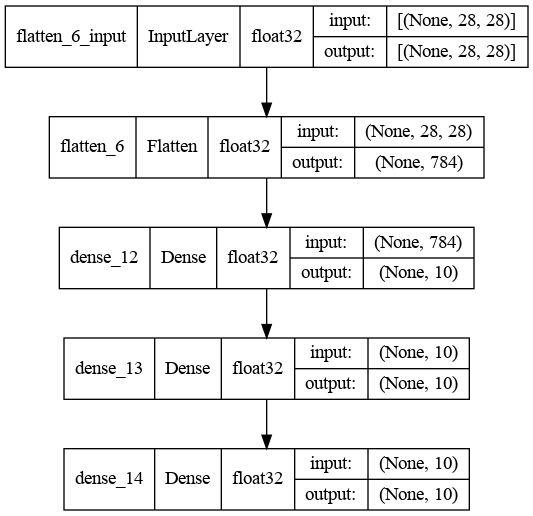

In [121]:
# Let's check out another way of viewing our deep learning models
from tensorflow.keras.utils import plot_model
# See the inputs and outputs of each layer
tf.keras.utils.plot_model(model_4, show_shapes=True, show_dtype=True, to_file='../model_plot/multi-classification.png')